     init   rtn     avg   dev  bkmax  skmax  bomega  somega   bpri      bfor  \
0  192333  -500  192670  1452     12     14  -0.002   0.002 -0.277  2146.762   
1  192562 -4848  187788  1542      5      6   0.020   0.039 -0.385  5115.751   
2  188812 -2098  187049   574      4      7   0.001   0.001 -0.179  5378.637   
3  186556   944  187753   517      6      8   0.001  -0.001 -0.323  1546.270   
4  187794 -2982  185802   756     10     10  -0.001   0.001 -0.402  1937.626   

   ...   spri      sfor      smom      sc    spmax    smax   smomn    scn  \
0  ... -0.267  3284.428   412.228   9.682  315.230  23.000  10.655  0.052   
1  ... -0.404  6665.924  1028.882   8.776  721.892  30.500  10.915  0.032   
2  ... -0.228  2723.411   315.232  11.061  151.065  19.429   9.821  0.065   
3  ... -0.205  1627.165   208.041   8.732  216.675  23.125   8.048  0.056   
4  ... -0.129  2233.416   208.066  11.381   91.132  22.300   7.397  0.073   

     spmaxn  smaxn  
0  1293.851  0.000  
1  1239.855  6

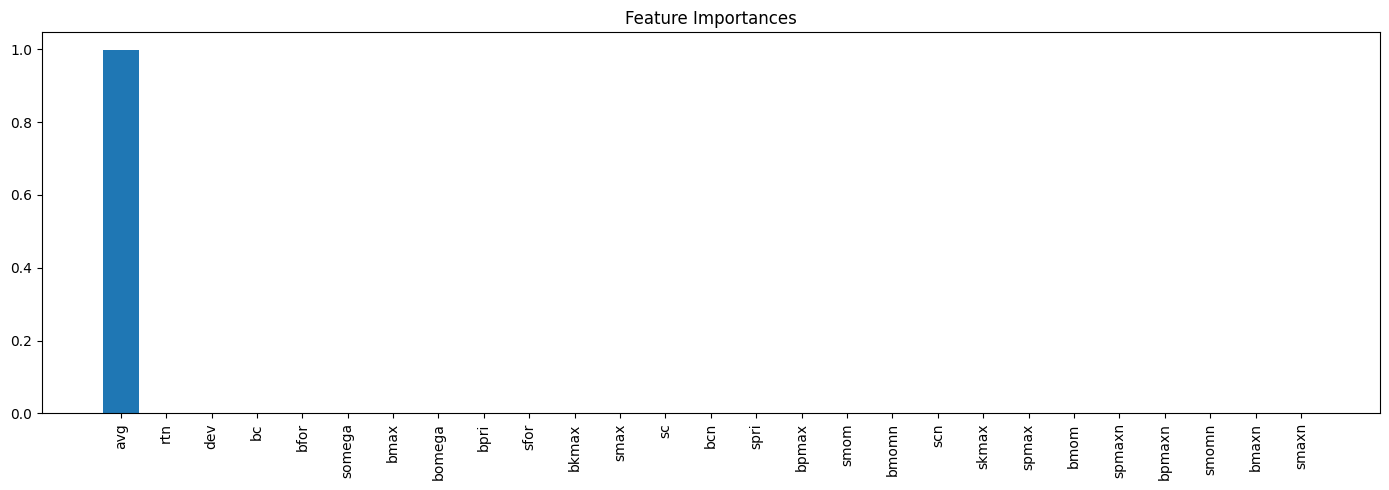

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv("data/bsmax_0_1", sep='\t') 

# ymd 지우기
df = df.drop(['ymd'], axis=1)
print(df.head())
print(df.shape)
header = "init	rtn	avg	dev	bkmax	skmax	bomega	somega	bpri	bfor	bmom	bc	bpmax	bmax	bmomn	bcn	bpmaxn	bmaxn	spri	sfor	smom	sc	spmax	smax	smomn	scn	spmaxn	smaxn".split("\t")
print(header)

# StandardScaler를 사용하여 데이터를 정규화합니다.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 예측하려는 타겟 변수 'init'과 피쳐들을 분리합니다.
target = df['init']
features = df.drop(columns=['init'])

# 데이터를 학습용과 검증용으로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델을 구축합니다.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 변수 중요도 계산
importances = rf_model.feature_importances_
feature_names = features.columns

# 중요도 시각화
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(14, 5))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()
